In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to C:\Users\Arun
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Arun
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df_e2w = pd.read_csv('data3.csv')

In [6]:
df_e2w.head()

,Customer ID,Location,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs
0,C001,Delhi,5,4,3,4,3,5,5
1,C002,Mumbai,3,5,1,5,1,1,3
2,C003,Bangalore,4,3,5,5,5,3,5
3,C004,Hyderabad,3,4,4,3,3,3,5
4,C005,Chennai,4,5,2,5,1,5,5


In [7]:
df_e2w.shape

(20, 9)

In [8]:
df_e2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Customer ID                             20 non-null     object
 1   Location                                20 non-null     object
 2   Environmental Consciousness             20 non-null     int64 
 3   Technology Enthusiasm                   20 non-null     int64 
 4   Cost Sensitivity                        20 non-null     int64 
 5   Convenience Preference                  20 non-null     int64 
 6   Concern for EV Charging Infrastructure  20 non-null     int64 
 7   Attitude Toward Climate Change          20 non-null     int64 
 8   Interest in EVs                         20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB


In [9]:
df_e2w.describe()

,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.850000,3.800000,3.500000,4.150000,2.950000,3.700000,4.200000
std,0.933302,0.951453,1.235442,0.812728,1.605091,1.341641,1.005249
min,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000
25%,3.000000,3.000000,3.000000,3.750000,1.000000,3.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,5.000000
75%,5.000000,4.250000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
print(df_e2w.dtypes)

Customer ID                               object
Location                                  object
Environmental Consciousness                int64
Technology Enthusiasm                      int64
Cost Sensitivity                           int64
Convenience Preference                     int64
Concern for EV Charging Infrastructure     int64
Attitude Toward Climate Change             int64
Interest in EVs                            int64
dtype: object


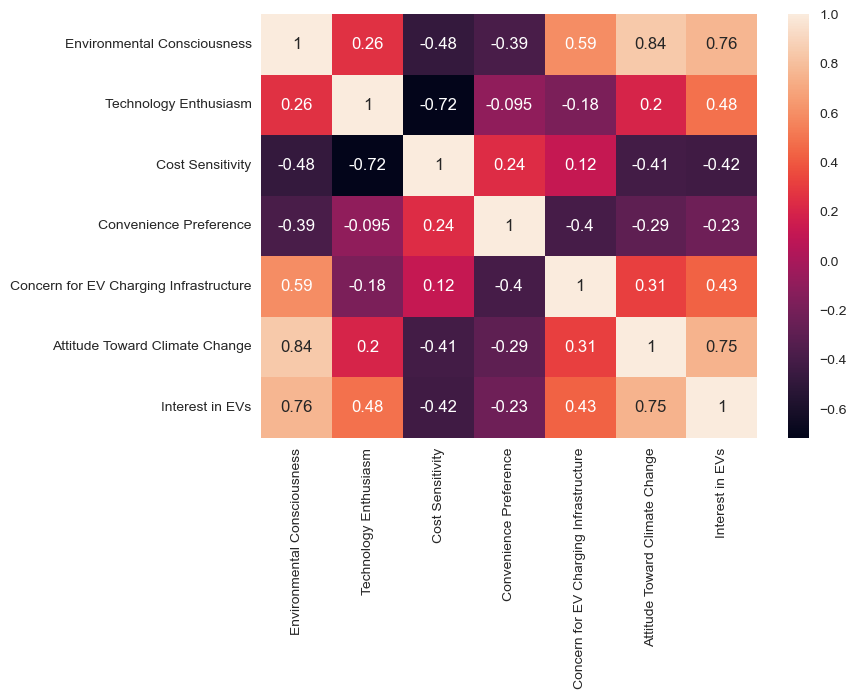

In [11]:
df_e2w_numeric = df_e2w.select_dtypes(include=[np.number])
sns.heatmap(df_e2w_numeric.corr(), annot=True)
plt.show()

In [12]:
df_e2w['Location'].value_counts(normalize=True)*100

Location
Delhi         5.0
Mumbai        5.0
Chandigarh    5.0
Vadodara      5.0
Faridabad     5.0
Thane         5.0
Nagpur        5.0
Patna         5.0
Surat         5.0
Indore        5.0
Bhopal        5.0
Lucknow       5.0
Jaipur        5.0
Ahmedabad     5.0
Kolkata       5.0
Pune          5.0
Chennai       5.0
Hyderabad     5.0
Bangalore     5.0
Guwahati      5.0
Name: proportion, dtype: float64

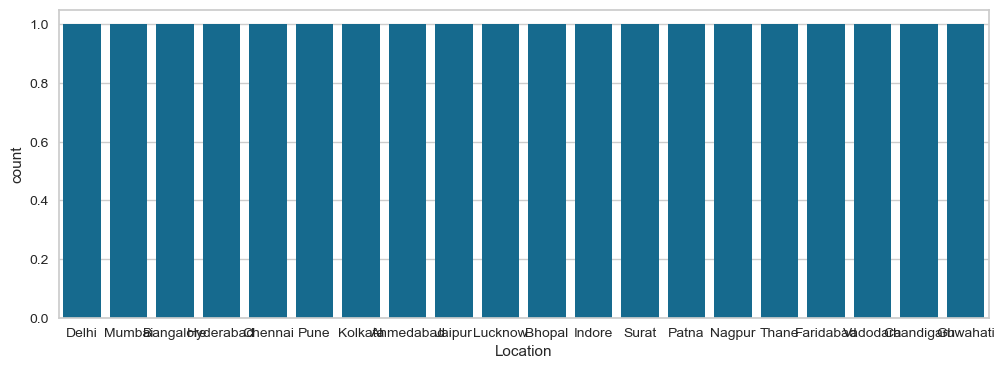

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x='Location', data=df_e2w)
plt.show()

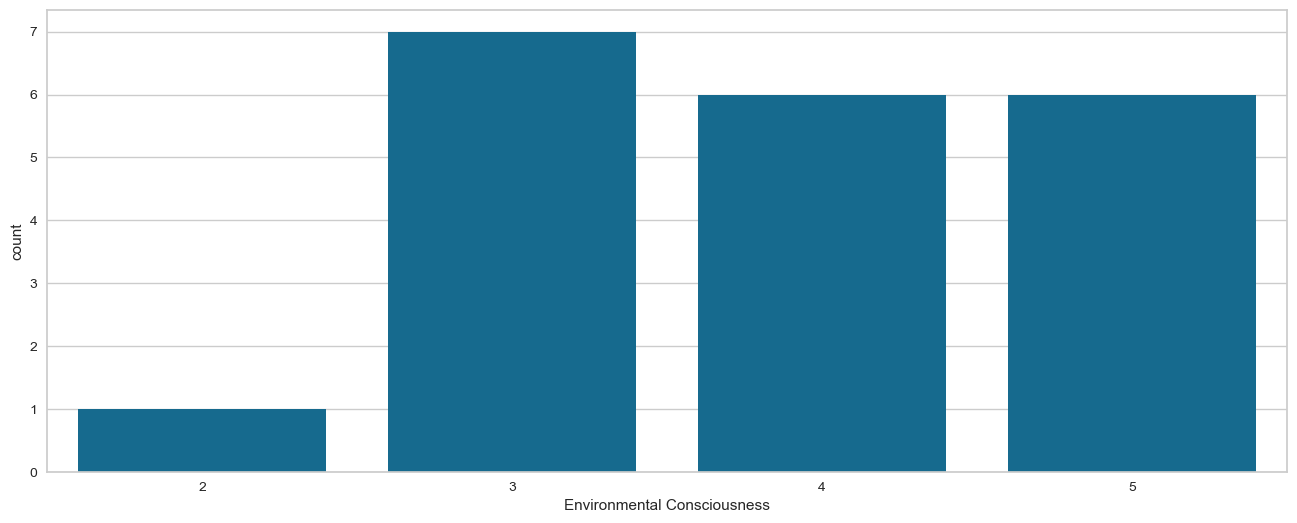

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(x='Environmental Consciousness', data=df_e2w)
plt.show()

In [15]:
df_e2w['Technology Enthusiasm'].value_counts(normalize=True)*100

Technology Enthusiasm
4    40.0
5    25.0
3    25.0
2    10.0
Name: proportion, dtype: float64

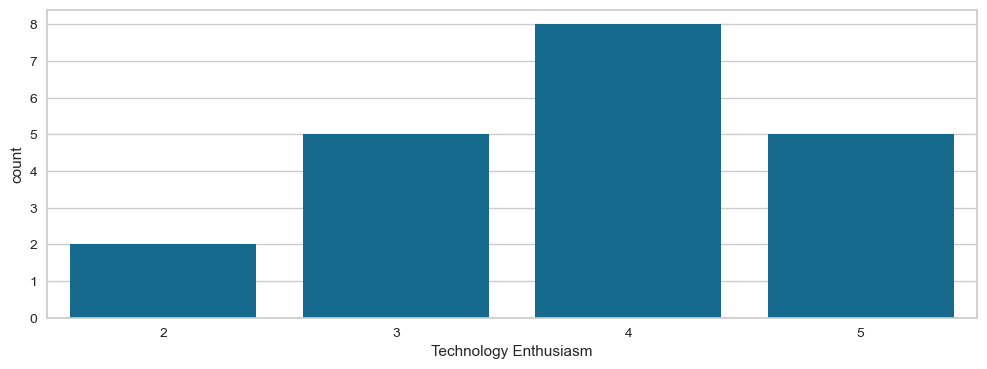

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='Technology Enthusiasm', data=df_e2w)
plt.show()

In [17]:
df_e2w['Cost Sensitivity'].value_counts(normalize=True)*100

Cost Sensitivity
3    35.0
5    30.0
4    15.0
2    15.0
1     5.0
Name: proportion, dtype: float64

In [18]:
print(df_e2w.columns)

Index(['Customer ID', 'Location', 'Environmental Consciousness',
       'Technology Enthusiasm', 'Cost Sensitivity', 'Convenience Preference',
       'Concern for EV Charging Infrastructure',
       'Attitude Toward Climate Change', 'Interest in EVs'],
      dtype='object')


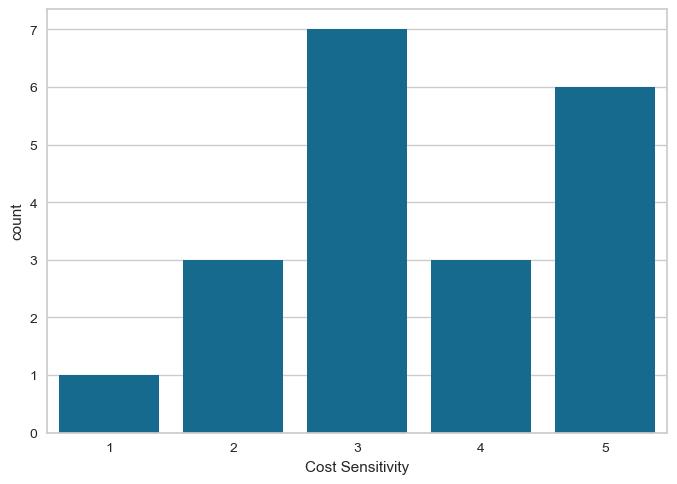

In [19]:
sns.countplot(x='Cost Sensitivity', data=df_e2w)
plt.show()

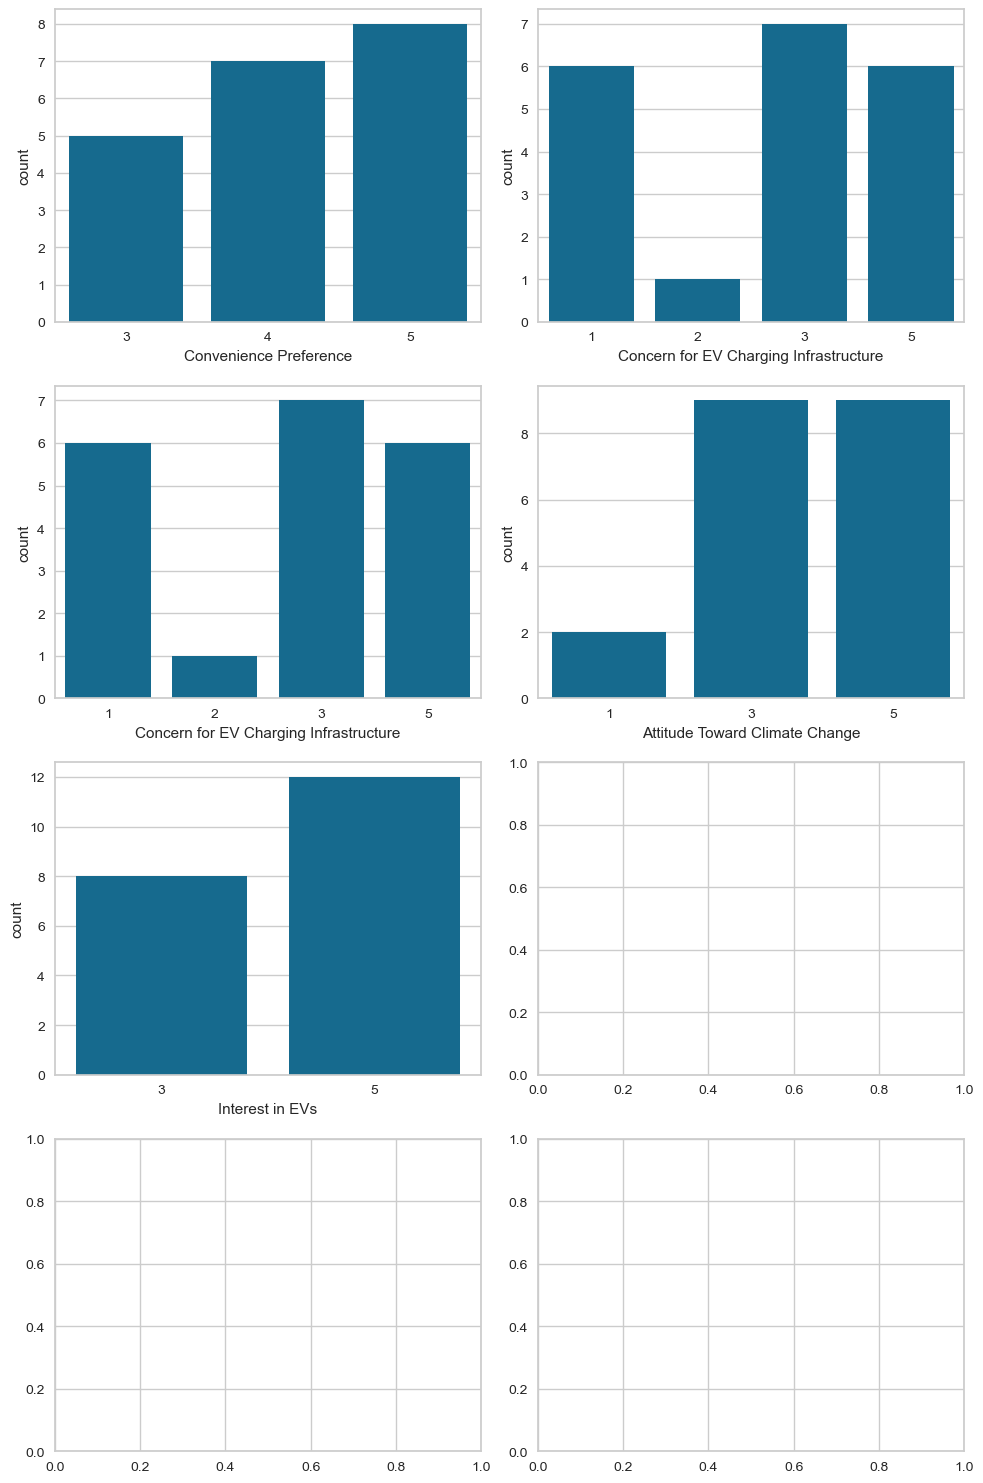

In [44]:
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Convenience Preference', data=df_e2w, ax=axes[0][0])
sns.countplot(x='Concern for EV Charging Infrastructure', data=df_e2w, ax=axes[0][1])
sns.countplot(x='Concern for EV Charging Infrastructure', data=df_e2w, ax=axes[1][0])
sns.countplot(x='Attitude Toward Climate Change', data=df_e2w, ax=axes[1][1])
sns.countplot(x='Interest in EVs', data=df_e2w, ax=axes[2][0])
plt.show()

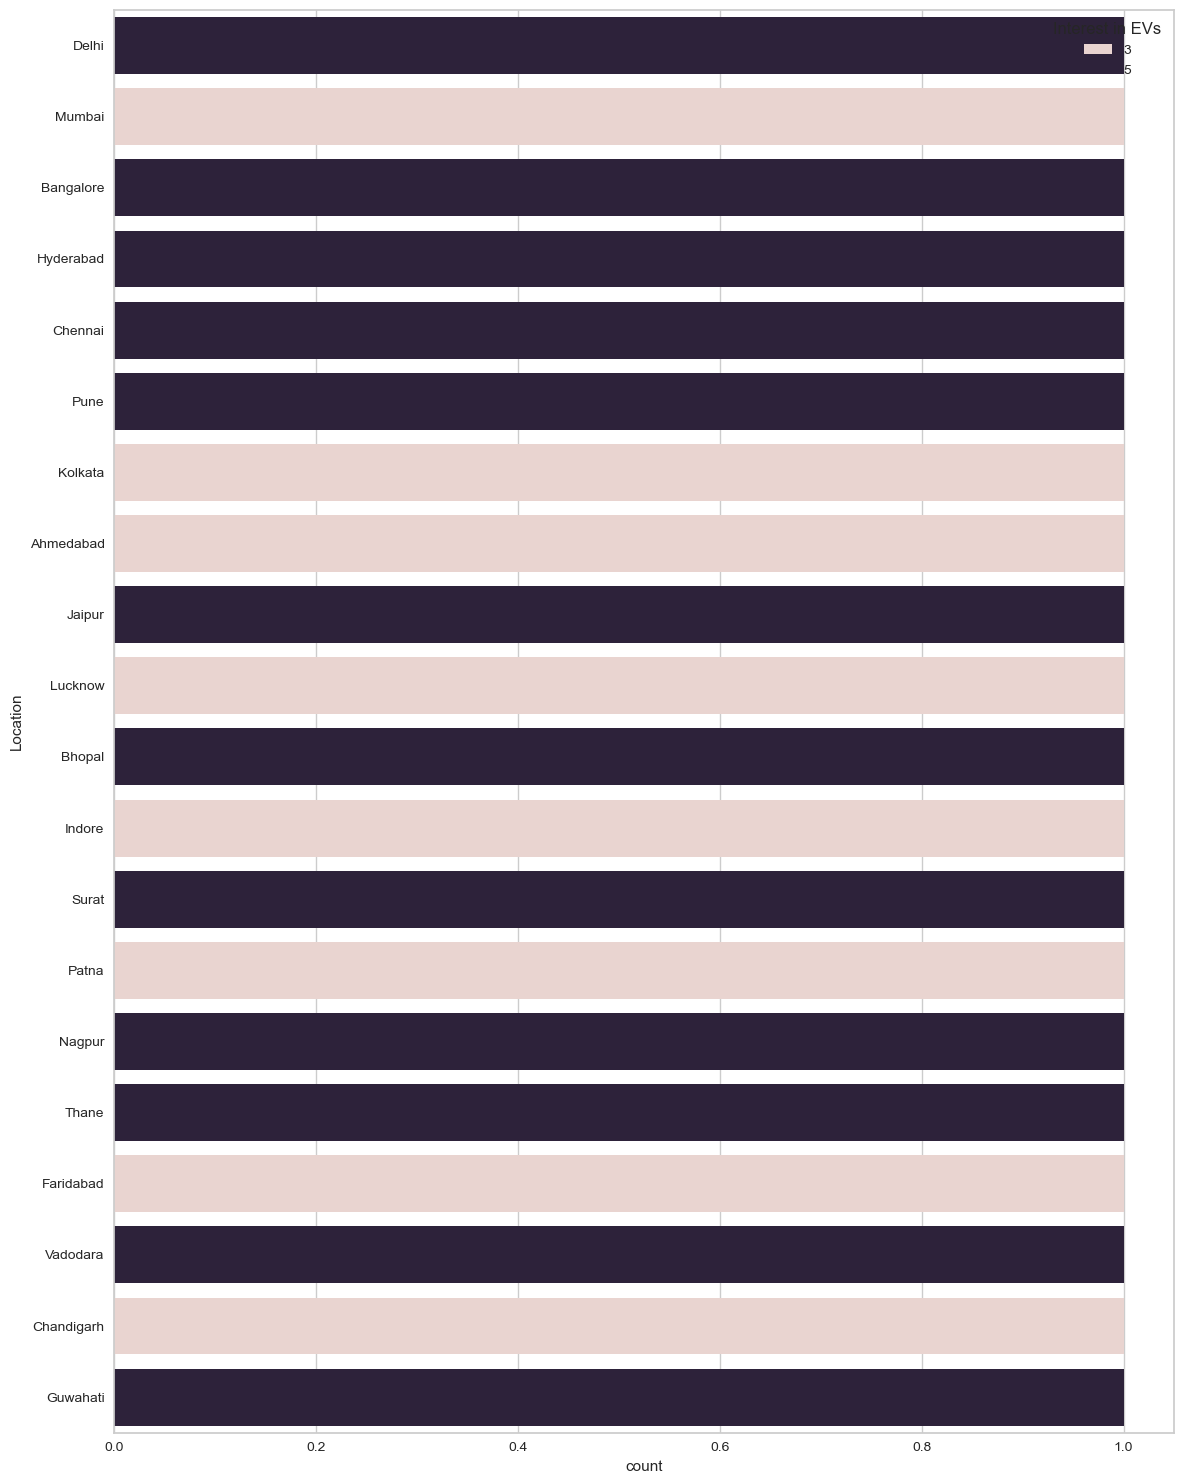

In [36]:
plt.figure(figsize=(12,15))
sns.countplot(y='Location', data=df_e2w, hue='Interest in EVs')
plt.show()

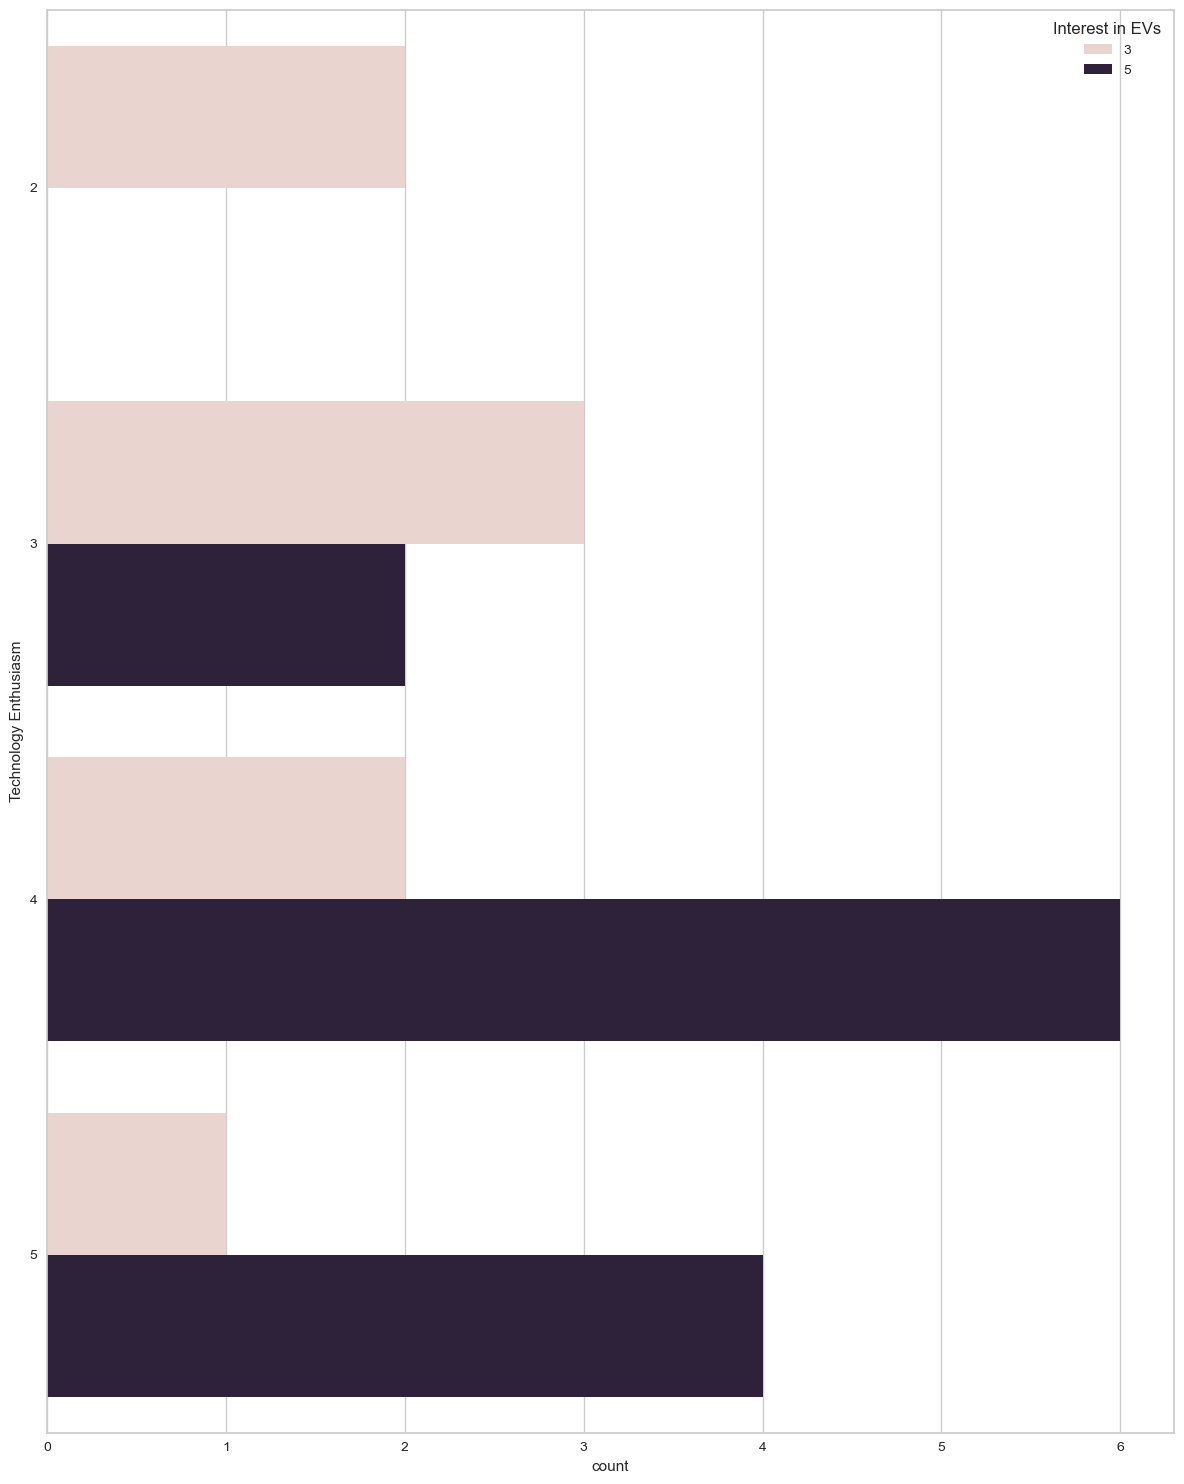

In [38]:
plt.figure(figsize=(12,15))
sns.countplot(y='Technology Enthusiasm', data=df_e2w, hue='Interest in EVs')
plt.show()

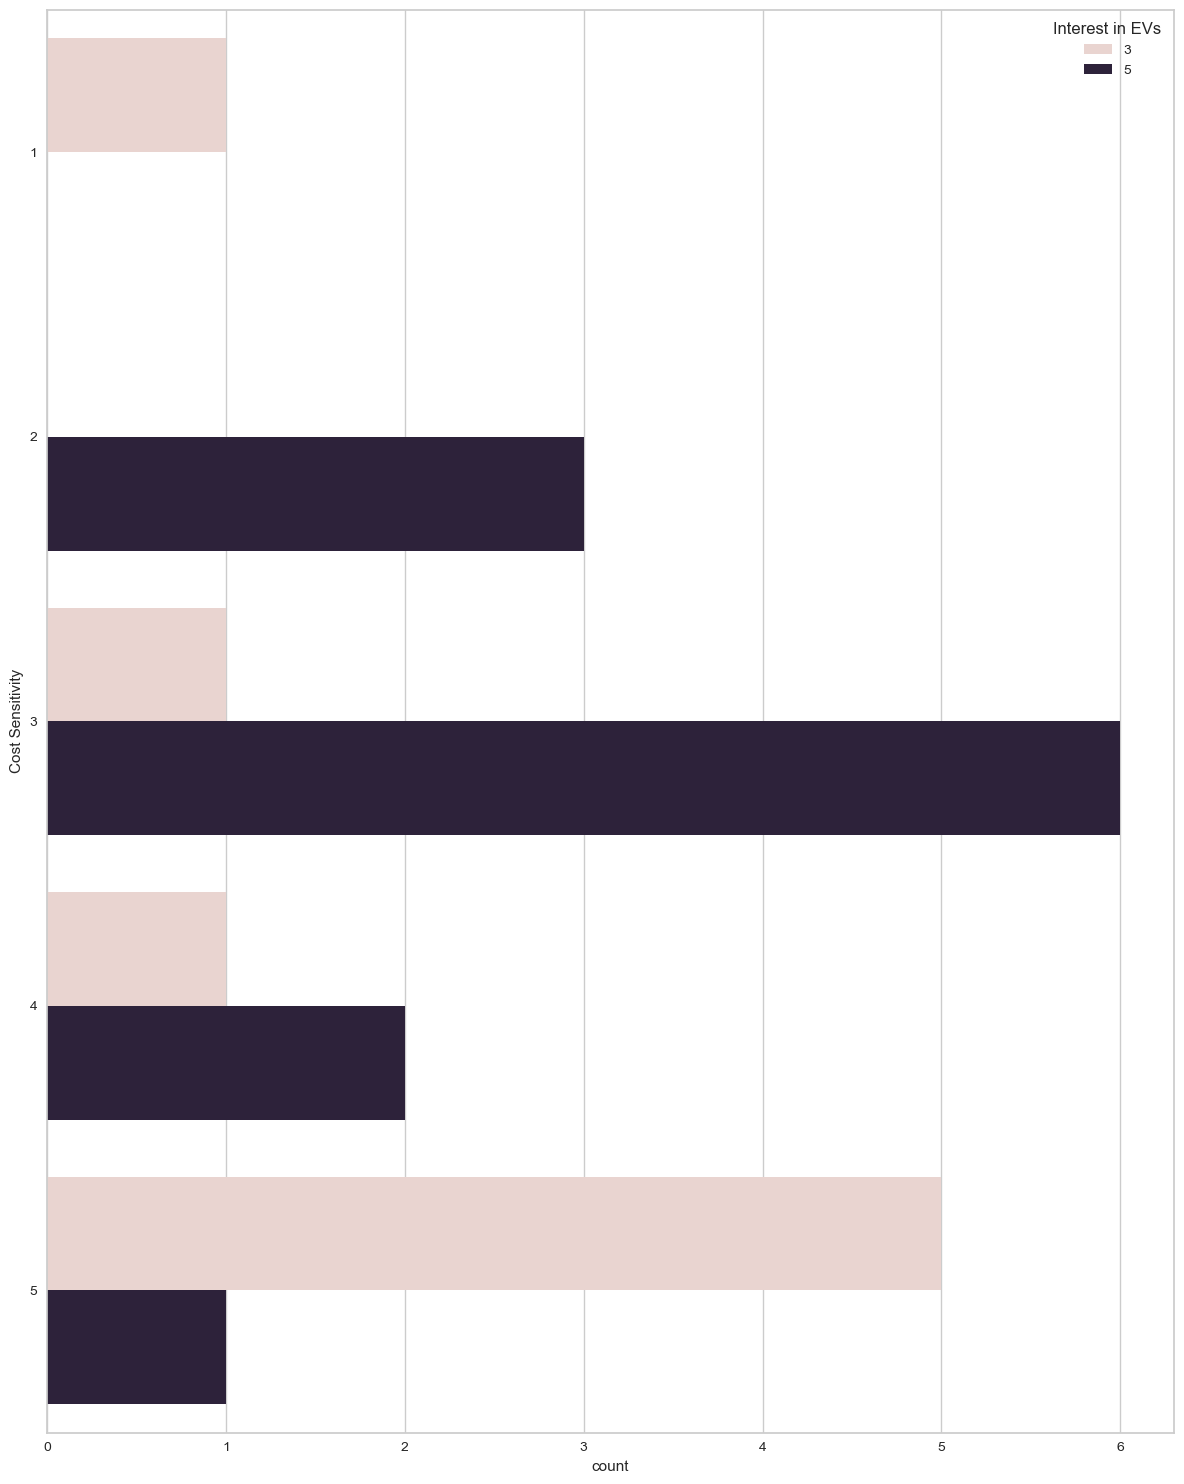

In [46]:
plt.figure(figsize=(12,15))
sns.countplot(y='Cost Sensitivity', data=df_e2w, hue='Interest in EVs')
plt.show()

In [48]:
df1 = df_e2w.copy()
df1.head()

,Customer ID,Location,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs
0,C001,Delhi,5,4,3,4,3,5,5
1,C002,Mumbai,3,5,1,5,1,1,3
2,C003,Bangalore,4,3,5,5,5,3,5
3,C004,Hyderabad,3,4,4,3,3,3,5
4,C005,Chennai,4,5,2,5,1,5,5


In [50]:
df1.drop(df1.iloc[:,10:],inplace=True, axis=1)
df1.head()

,Customer ID,Location,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs
0,C001,Delhi,5,4,3,4,3,5,5
1,C002,Mumbai,3,5,1,5,1,1,3
2,C003,Bangalore,4,3,5,5,5,3,5
3,C004,Hyderabad,3,4,4,3,3,3,5
4,C005,Chennai,4,5,2,5,1,5,5


In [52]:
lm = WordNetLemmatizer()

In [54]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ', str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in (text))
  return text

In [56]:
df1['Interest in EVs'][0]

5

In [58]:
df1['Interest in EVs'][0:1].apply(clean)


0    
Name: Interest in EVs, dtype: object

In [60]:
# Creating a function to get polarity and subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def polarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [62]:
df1['cleantext'] = df1['Interest in EVs'].apply(clean)
df1['subjectivity'] = df1['cleantext'].apply(subjectivity)
df1['polarity'] = df1['cleantext'].apply(polarity)
df1['analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

,Customer ID,Location,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs,cleantext,subjectivity,polarity,analysis
0,C001,Delhi,5,4,3,4,3,5,5,,0.0,0.0,Neutral
1,C002,Mumbai,3,5,1,5,1,1,3,,0.0,0.0,Neutral
2,C003,Bangalore,4,3,5,5,5,3,5,,0.0,0.0,Neutral
3,C004,Hyderabad,3,4,4,3,3,3,5,,0.0,0.0,Neutral
4,C005,Chennai,4,5,2,5,1,5,5,,0.0,0.0,Neutral


In [64]:
score = df1['analysis'].value_counts()
score

analysis
Neutral    20
Name: count, dtype: int64

In [91]:
df2 = df_e2w.copy()
df2 = df2.iloc[:,2:6]
df2=df2.fillna(0)
df2.head()

,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference
0,5,4,3,4
1,3,5,1,5
2,4,3,5,5
3,3,4,4,3
4,4,5,2,5


In [93]:
pca = PCA()
principal_components = pca.fit_transform(df2)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2','PCA3','PCA4'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-0.945716,-0.634735,-0.558172,0.161793
1,-2.004474,2.052551,0.098213,-0.945765
2,1.634492,-0.197373,-0.889062,0.366124
3,0.390401,-0.186893,1.443241,0.254387
4,-1.627809,1.233638,-0.511436,-0.042530


In [95]:
pca_df[['PCA1','PCA2','PCA3','PCA4']].std()

PCA1    1.552384
PCA2    0.912758
PCA3    0.664328
PCA4    0.528016
dtype: float64

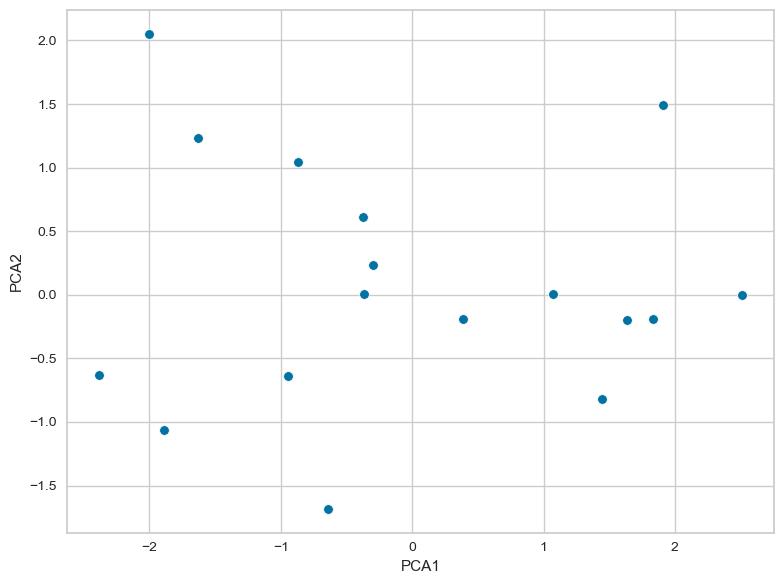

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()

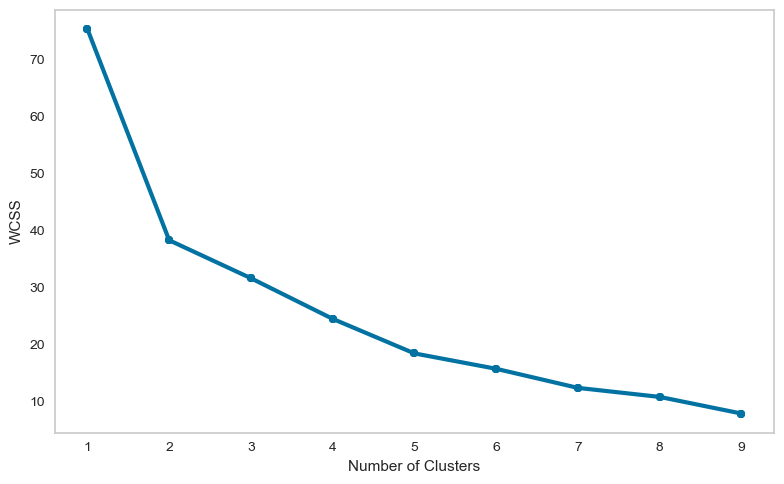

In [99]:
# Using elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 10)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

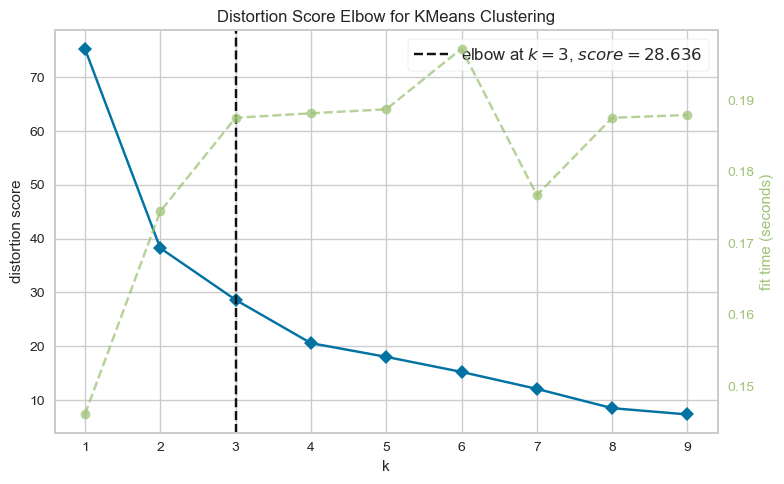

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:

plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(df2)
visualizer.show()

In [103]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,cluster
0,-0.945716,-0.634735,-0.558172,0.161793,2
1,-2.004474,2.052551,0.098213,-0.945765,1
2,1.634492,-0.197373,-0.889062,0.366124,0
3,0.390401,-0.186893,1.443241,0.254387,0
4,-1.627809,1.233638,-0.511436,-0.042530,1


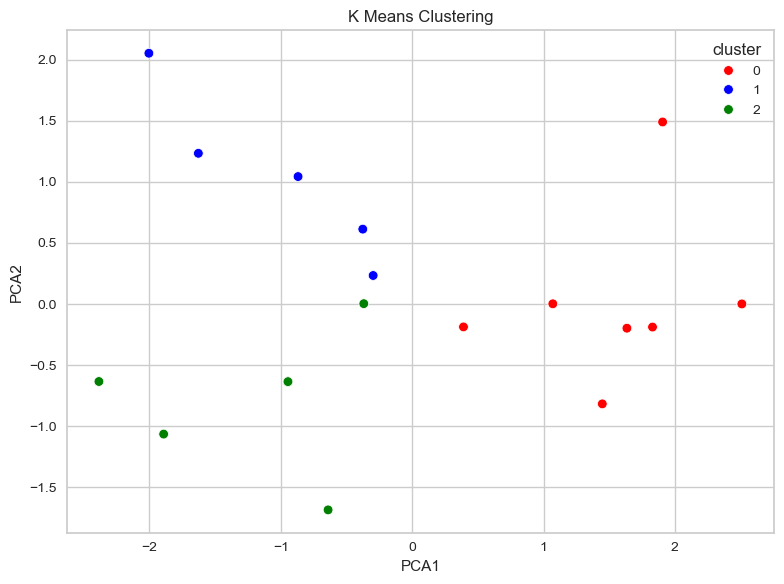

In [105]:

plt.figure(figsize=(8,6))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster', data=pca_df_kmeans, palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [107]:

k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans1 = pd.concat([df_e2w,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1 = pca_df_kmeans1.fillna(0)
pca_df_kmeans1.head()

,Customer ID,Location,Environmental Consciousness,Technology Enthusiasm,Cost Sensitivity,Convenience Preference,Concern for EV Charging Infrastructure,Attitude Toward Climate Change,Interest in EVs,cluster
0,C001,Delhi,5,4,3,4,3,5,5,1
1,C002,Mumbai,3,5,1,5,1,1,3,1
2,C003,Bangalore,4,3,5,5,5,3,5,2
3,C004,Hyderabad,3,4,4,3,3,3,5,0
4,C005,Chennai,4,5,2,5,1,5,5,1


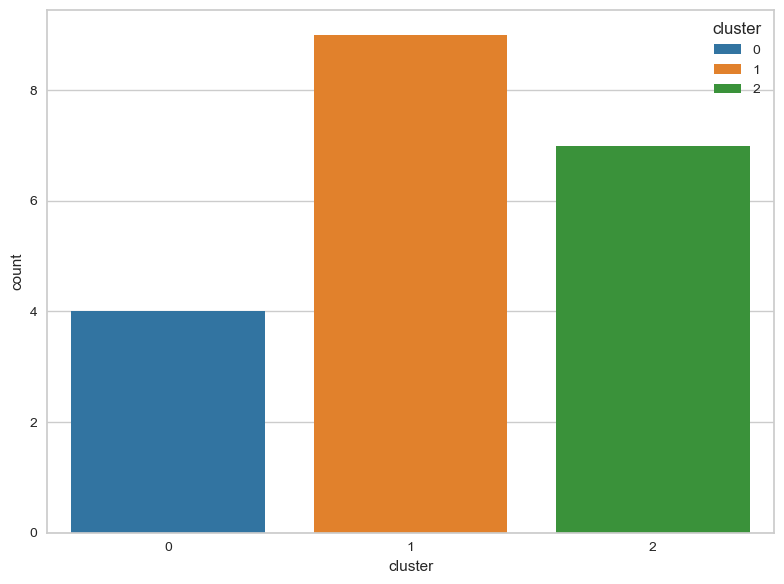

In [109]:

plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster',palette='tab10')
plt.show()

In [111]:

pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

cluster
1    45.0
2    35.0
0    20.0
Name: proportion, dtype: float64

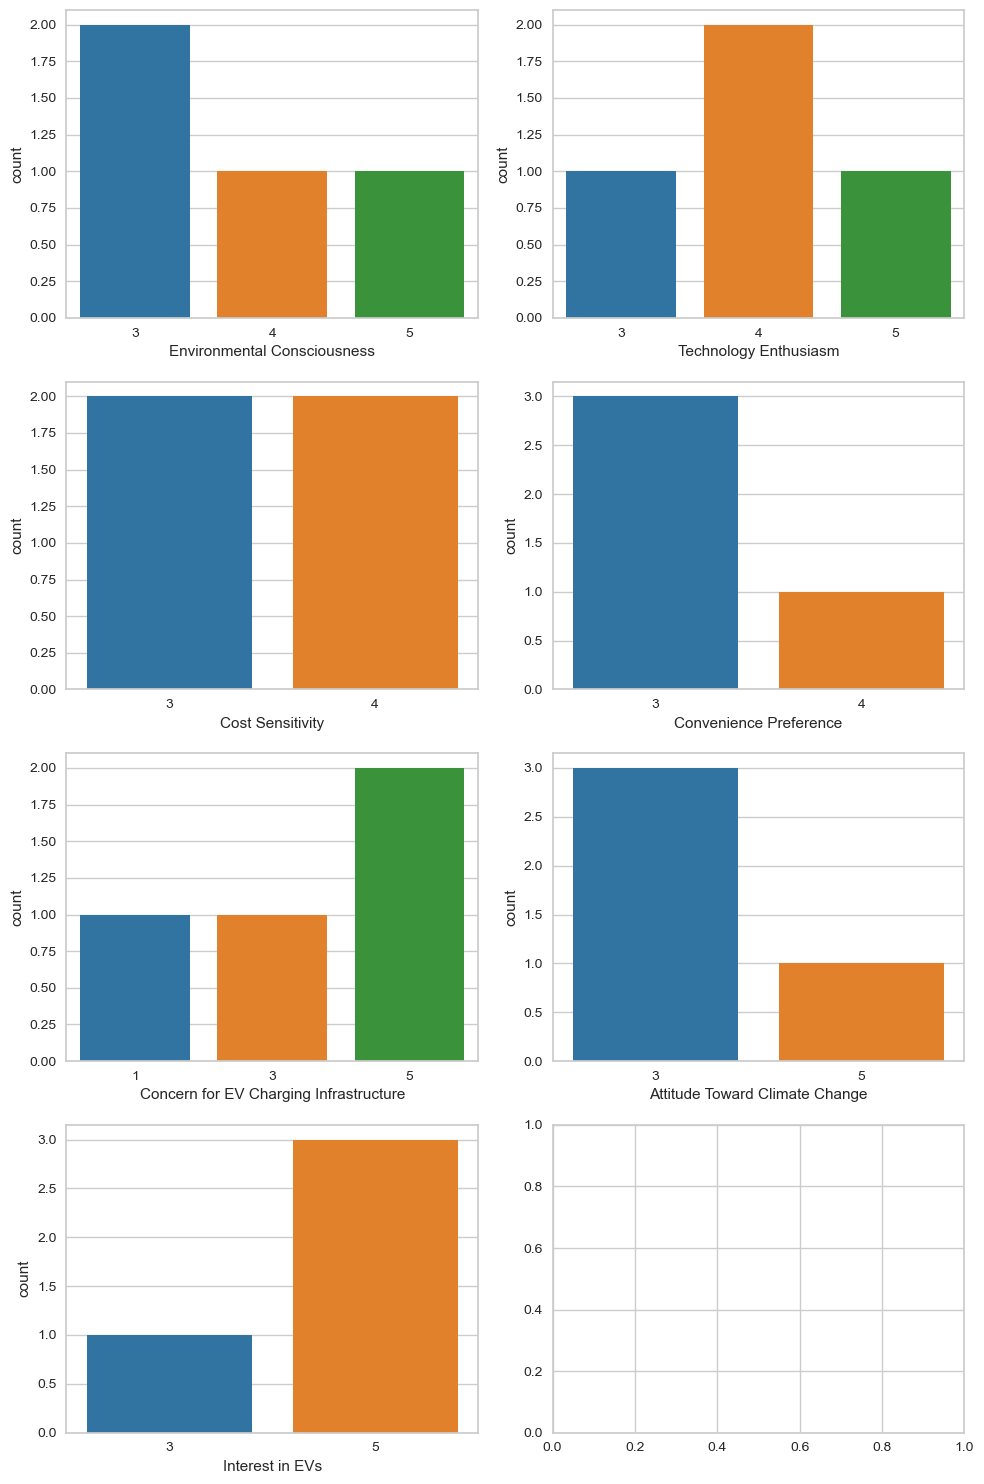

In [113]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Environmental Consciousness',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Technology Enthusiasm',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[0][1], palette='tab10')
sns.countplot(x='Cost Sensitivity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][0], palette='tab10')
sns.countplot(x='Convenience Preference',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][1], palette='tab10')
sns.countplot(x='Concern for EV Charging Infrastructure',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][0], palette='tab10')
sns.countplot(x='Attitude Toward Climate Change',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][1], palette='tab10')
sns.countplot(x='Interest in EVs',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[3][0], palette='tab10')
plt.show()

ValueError: Could not interpret value `I` for `x`. An entry with this name does not appear in `data`.

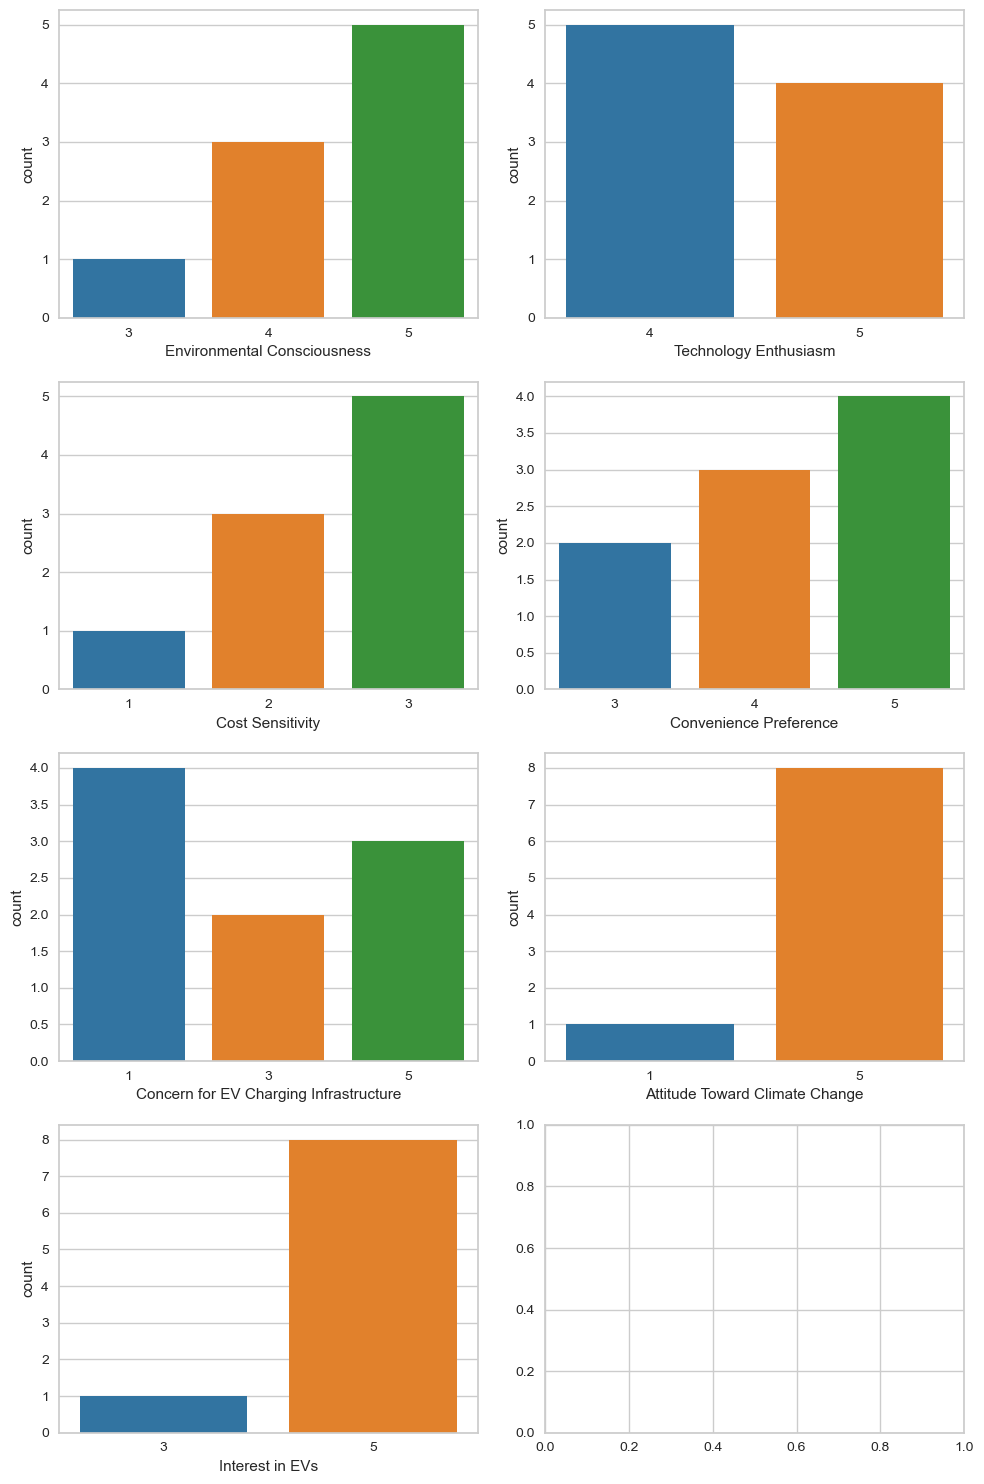

In [115]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Environmental Consciousness',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Technology Enthusiasm',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[0][1], palette='tab10')
sns.countplot(x='Cost Sensitivity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][0], palette='tab10')
sns.countplot(x='Convenience Preference',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][1], palette='tab10')
sns.countplot(x='Concern for EV Charging Infrastructure',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][0], palette='tab10')
sns.countplot(x='Attitude Toward Climate Change',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][1], palette='tab10')
sns.countplot(x='Interest in EVs',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][0], palette='tab10')
sns.countplot(x='I',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][1], palette='tab10')
plt.show()

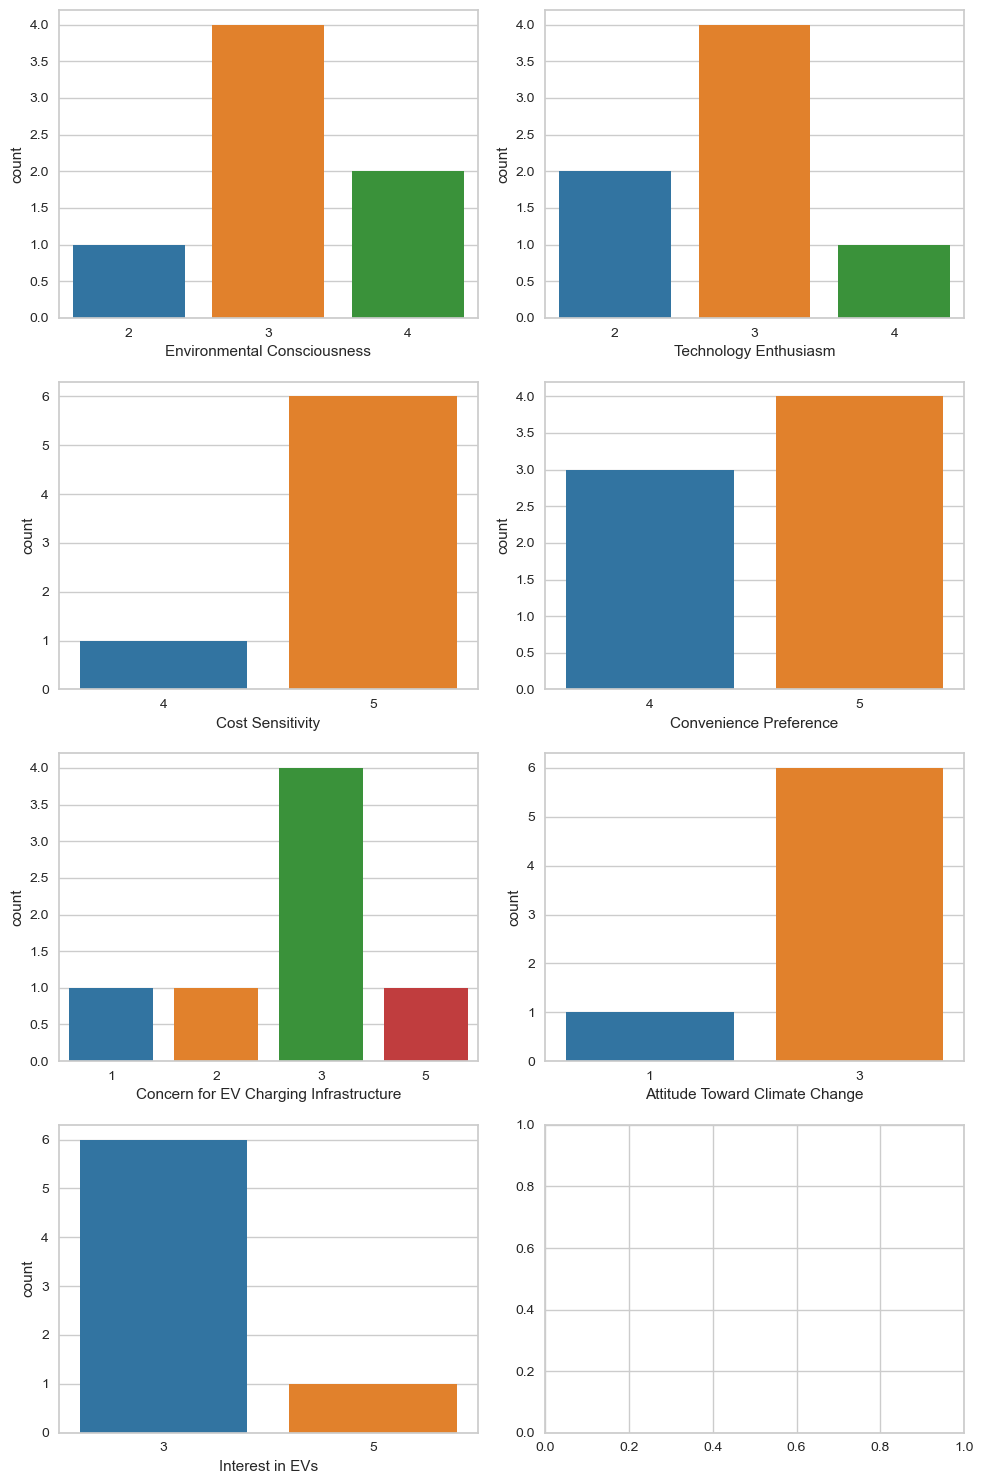

In [117]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Environmental Consciousness',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Technology Enthusiasm',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[0][1], palette='tab10')
sns.countplot(x='Cost Sensitivity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][0], palette='tab10')
sns.countplot(x='Convenience Preference',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][1], palette='tab10')
sns.countplot(x='Concern for EV Charging Infrastructure',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][0], palette='tab10')
sns.countplot(x='Attitude Toward Climate Change',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][1], palette='tab10')
sns.countplot(x='Interest in EVs',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[3][0], palette='tab10')
plt.show()